In [ ]:
import pandas as pd
  
# read an excel file 

n_conf = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/minor project/not_confused.xlsx"))
conf = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/minor project/confused.xlsx"))  

In [ ]:
n_conf.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
0,278,-50,101,-5,-8,73,130,-2,17,-59,-14,72,121,-52,69,44,144,25,-138,25,124,43,35,119,37,102,24,-51,61,290,-21,4,-156,-22,3,0,186,40,88,26,...,33,-89,144,43,-197,18,58,-100,-57,20,85,259,11,-17,86,341,-8,114,58,3,51,54,49,42,12,101,-33,108,-39,40,53,72,-45,327,40,-25,153,200,121,0
1,9,35,-129,-135,54,-21,147,-106,376,7,-106,41,213,104,-120,141,-114,29,-245,32,123,201,107,-97,161,-231,80,75,57,101,-162,-76,-65,102,59,66,3,17,-23,104,...,164,4,-28,-27,34,18,39,-29,60,-43,-27,61,-24,26,70,10,119,52,29,-9,68,-56,192,60,59,-6,8,43,11,-1,117,-3,-4,91,2,61,-11,157,134,0
2,-151,121,122,136,27,52,-99,91,20,22,35,67,27,-27,84,91,11,40,45,29,0,75,19,16,-13,1,49,101,134,102,-22,246,-53,1,-42,61,-3,109,21,57,...,41,-106,-59,93,55,-13,16,-145,6,-11,5,8,50,162,7,34,57,-41,104,103,203,24,11,-297,42,19,38,7,55,-164,-18,120,92,119,17,1,24,75,102,0
3,196,17,-130,35,52,81,93,134,1,-188,-2,18,-2,-13,60,-37,51,-45,91,-58,-10,-19,29,85,-36,74,75,-35,52,18,1,85,-3,102,64,12,42,-46,32,44,...,-22,5,35,121,-19,160,-5,36,75,-157,117,73,76,55,114,137,-35,71,-56,11,67,-69,28,12,60,-60,73,12,104,52,21,80,12,-53,-25,32,70,-34,17,0
4,-11,28,49,-5,-7,49,42,48,129,-24,96,1,198,96,-60,33,-11,163,-70,3,108,-4,152,28,-2,-70,85,-98,53,202,169,-10,-26,170,197,-54,76,8,42,86,...,-71,-142,197,60,72,91,43,35,40,84,88,42,197,-13,137,-8,86,20,-11,-145,-11,-34,37,203,58,-10,35,-2,89,72,9,16,52,130,19,-23,55,6,55,0


In [ ]:
conf.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
0,-58,18,84,-24,-68,50,38,109,-76,105,89,28,-46,33,-68,69,-71,-11,150,156,34,168,8,-39,41,-89,74,128,109,105,23,-69,-36,56,-1,-81,-130,77,-29,140,...,-75,-36,181,11,38,-151,17,55,26,-38,41,-181,96,104,-26,562,321,16,-4,24,35,52,-2,-70,8,97,-7,59,70,152,-90,-180,38,4,-3,48,9,84,-38,1
1,-1,100,55,90,-35,-137,-41,-9,-25,-102,37,99,-94,80,93,-35,36,-50,36,23,53,-39,-18,12,-183,86,16,145,-45,-83,92,-257,-58,35,-73,-259,71,23,-27,54,...,-26,-35,105,83,-77,56,180,232,-156,413,-446,119,49,37,-38,-85,-70,91,90,106,117,6,-26,171,21,-12,138,-22,71,105,-8,-9,-24,9,113,-107,119,-6,-10,1
2,90,208,200,66,-168,203,134,-90,12,-178,-157,106,96,-85,-42,160,-21,113,172,-125,-94,113,81,109,177,-24,-33,-41,75,7,-26,-28,-5,-11,-11,-10,214,-35,69,25,...,12,103,-1,74,202,-14,60,-36,186,187,58,53,-34,-129,34,38,148,-57,167,16,99,39,-51,121,-38,60,-21,4,4,24,87,-60,87,35,-169,195,69,-3,21,1
3,43,89,67,106,-104,-19,65,-3,157,-30,42,34,44,58,56,109,113,146,104,144,102,-25,133,-81,107,69,198,86,58,57,45,-2,-54,124,34,99,-107,-364,124,35,...,93,-14,112,50,9,57,349,84,-13,-33,52,101,-152,38,26,-29,4,2,37,71,118,105,-61,-30,-50,50,105,171,-27,97,72,98,9,11,74,68,92,137,26,1
4,134,23,68,68,56,-19,39,10,51,137,128,187,-235,6,45,10,0,2,-123,108,50,27,12,-11,103,-116,150,5,133,162,36,24,27,203,74,-113,56,107,54,-28,...,69,-54,168,136,90,50,21,106,-41,-109,53,27,72,84,-4,40,-124,-49,40,82,108,-93,-73,69,8,41,76,217,-34,-167,172,-145,18,17,-62,81,-65,70,5,1


In [ ]:
column_name=['C0']
for num in range(n_conf.shape[1]-1):
  tem='C'+str(num+1)
  column_name.append(tem)
n_conf.columns=column_name

In [ ]:
new_column_name=['C0']
for num in range(conf.shape[1]-1):
  tem='C'+str(num+1)
  new_column_name.append(tem)
conf.columns=new_column_name

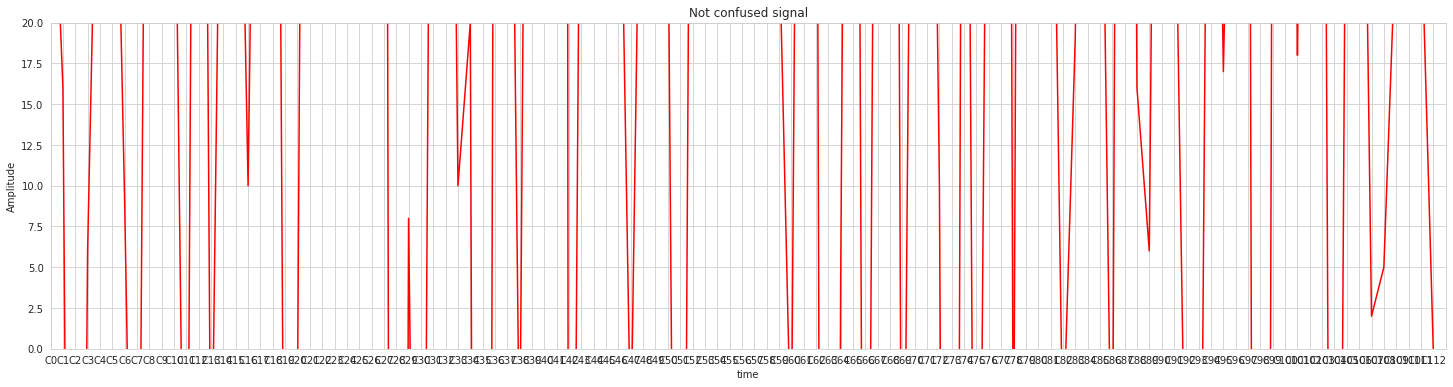

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(25,6))
plt.plot(n_conf.iloc[5,0:113],color='red')
plt.title("Not confused signal")
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.axis([0,113,0,20])
plt.show()

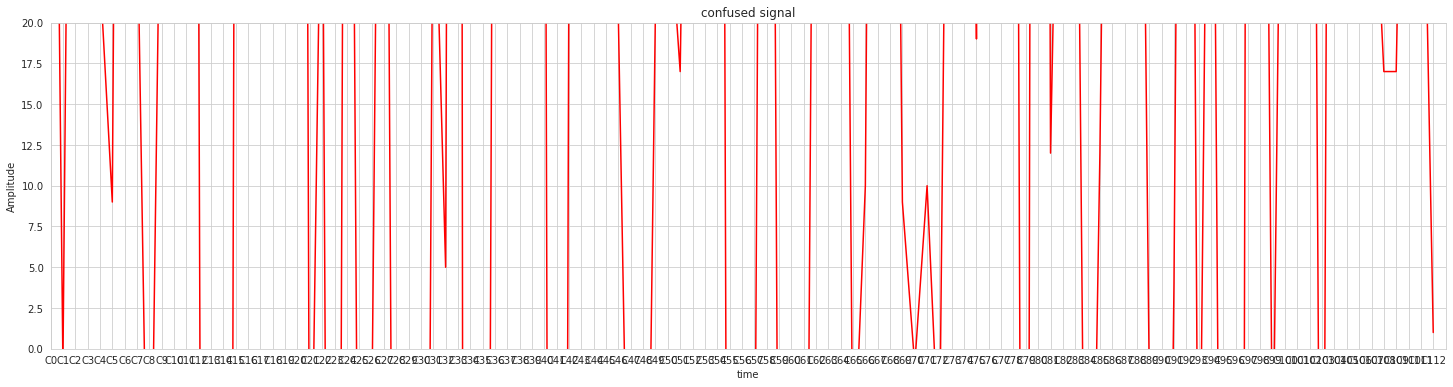

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,6))
plt.plot(conf.iloc[5,0:113],color='red')
plt.title("confused signal")
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.axis([0,113,0,20])
plt.show()

In [ ]:
n_conf.isnull().sum()
conf.isnull().sum()

C0      0
C1      0
C2      0
C3      0
C4      0
       ..
C108    0
C109    0
C110    0
C111    0
C112    0
Length: 113, dtype: int64

In [ ]:
from sklearn.utils import resample
n_conf=resample(n_conf,n_samples=500,replace=True,random_state=123 )
n_conf.shape

(500, 113)

In [ ]:
conf=resample(conf,n_samples=500,replace=True,random_state=123 )
conf.shape

(500, 113)

In [ ]:
import pandas as pd
train_n_conf=n_conf.iloc[0:400]
test_n_conf=n_conf.iloc[400:500]
train_conf=conf.iloc[0:400]
test_conf=conf.iloc[400:500]
train=[train_n_conf,train_conf]
train=pd.concat(train,sort=False)
test=[test_n_conf,test_conf]
test=pd.concat(test,sort=False)
train.shape
test.shape

(200, 113)

In [ ]:
#Remove last column from data
ytrain=train.iloc[:,112]
ytrain.shape

ytest=test.iloc[:,112]
ytest.shape

train=train.iloc[:,:-1]
test=test.iloc[:,:-1]

In [ ]:
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

#one hot encoding
ytrain=keras.utils.np_utils.to_categorical(ytrain)
ytest=keras.utils.np_utils.to_categorical(ytest)

#converting to numpy array
train=np.asarray(train)
train=train.reshape(800,112,1) 

test=np.asarray(test)
test=test.reshape(200,112,1)

In [ ]:
import tensorflow as tf
import keras

def build_model():
  model=tf.keras.models.Sequential()
  #Layer 1
  model.add(tf.keras.layers.Conv1D(80,4,activation='relu',input_shape=(112,1)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling1D(3))
  #Layer 2
  model.add(tf.keras.layers.Conv1D(40,2,activation='relu',input_shape=(112,1)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling1D(3))


  #Flatten Layer
  model.add(tf.keras.layers.Flatten())

  #DenseLayer1
  model.add(tf.keras.layers.Dense(5,activation='relu'))

  #DenseLayer2
  model.add(tf.keras.layers.Dense(5,activation='relu'))

  #Output Layer
  model.add(tf.keras.layers.Dense(2,activation='softmax' ))
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 109, 80)           400       
_________________________________________________________________
batch_normalization (BatchNo (None, 109, 80)           320       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 36, 80)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 35, 40)            6440      
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 40)            160       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 40)            0         
_________________________________________________________________
flatten (Flatten)            (None, 440)               0

In [ ]:
history=model.fit(train,ytrain,validation_data=(test,ytest),epochs=5)

Epoch 1/5
25/25 [==============================] - 2s 26ms/step - loss: 0.6007 - accuracy: 0.6825 - val_loss: 0.5077 - val_accuracy: 0.6600
Epoch 2/5
25/25 [==============================] - 0s 16ms/step - loss: 0.3642 - accuracy: 0.8562 - val_loss: 0.3870 - val_accuracy: 0.7700
Epoch 3/5
25/25 [==============================] - 0s 16ms/step - loss: 0.1659 - accuracy: 0.9725 - val_loss: 0.2123 - val_accuracy: 0.9350
Epoch 4/5
25/25 [==============================] - 0s 16ms/step - loss: 0.0768 - accuracy: 0.9812 - val_loss: 0.1489 - val_accuracy: 0.9700
Epoch 5/5
25/25 [==============================] - 0s 16ms/step - loss: 0.0412 - accuracy: 0.9900 - val_loss: 0.1036 - val_accuracy: 0.9900


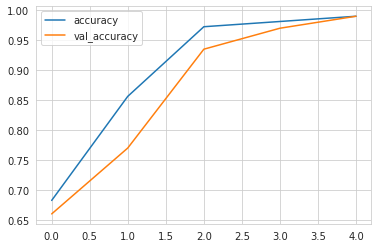

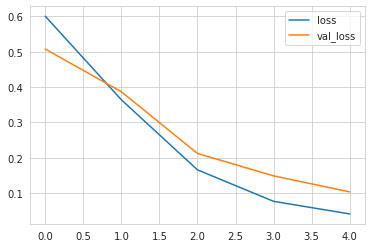

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
loss,accuracy=model.evaluate(test,ytest)
print('loss=',loss)
print('accuracy=',accuracy)

7/7 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9900
loss= 0.10362764447927475
accuracy= 0.9900000095367432


In [ ]:
P=model.predict(test)
print('P=',P)
print('shape of P=',P.shape)

P= [[8.63901615e-01 1.36098444e-01]
 [9.84806895e-01 1.51930209e-02]
 [7.57759392e-01 2.42240593e-01]
 [9.59747314e-01 4.02527265e-02]
 [9.22554255e-01 7.74457082e-02]
 [7.57759392e-01 2.42240593e-01]
 [9.49914217e-01 5.00857197e-02]
 [8.81476283e-01 1.18523747e-01]
 [9.99895215e-01 1.04744940e-04]
 [9.52353299e-01 4.76466678e-02]
 [8.73493254e-01 1.26506791e-01]
 [9.52353299e-01 4.76466678e-02]
 [8.45270813e-01 1.54729202e-01]
 [8.55523586e-01 1.44476444e-01]
 [9.92882490e-01 7.11755967e-03]
 [9.49914217e-01 5.00857197e-02]
 [9.72486675e-01 2.75133569e-02]
 [8.69904399e-01 1.30095616e-01]
 [9.45505381e-01 5.44946417e-02]
 [9.99895215e-01 1.04744940e-04]
 [8.81476283e-01 1.18523747e-01]
 [9.81934190e-01 1.80658307e-02]
 [9.65178013e-01 3.48220021e-02]
 [9.84806895e-01 1.51930209e-02]
 [8.93296003e-01 1.06704004e-01]
 [9.81934190e-01 1.80658307e-02]
 [8.93296003e-01 1.06704004e-01]
 [8.73493254e-01 1.26506791e-01]
 [9.20615792e-01 7.93841481e-02]
 [8.63901615e-01 1.36098444e-01]
 [8.814

In [ ]:
ypred=np.argmax(P,axis=1)
print('shape of ypred=',ypred.shape)

shape of ypred= (200,)


In [ ]:
ytest=np.argmax(ytest,axis=1)
print('shape of ytest=',ytest.shape)

shape of ytest= (200,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(ytest,ypred)
np.set_printoptions(precision=1)
print(cm)

[[ 98   2]
 [  0 100]]


In [ ]:
cm_df=pd.DataFrame(cm,columns=['predicted negative','predicted positive'],index=['Actual negative','Actual positive'])

cm_df

,predicted negative,predicted positive
Actual negative,98,2
Actual positive,0,100


In [ ]:
def binary_class_parameters(conf_matrix):
  TP=conf_matrix[1][1]
  TN=conf_matrix[0][0]
  FP=conf_matrix[0][1]
  FN=conf_matrix[1][0]

  print('True positives:',TP)
  print('True negatives:',TN)
  print('False positives:',FP)
  print('False negatives:',FN)

  ACC = (float(TP+TN)/float(TP+TN+FP+FN))
  MC=1-ACC
  RC=(TP/float(TP+FN))
  SP=(TN/float(TN+FP))
  PR=(TP/float(TP+FP))
  F1=2*((PR*RC)/(PR+RC))

  print('1. Accuracy : ',ACC)
  print('2. Mis-Classification : ',MC)
  print('3. Sensitivity recall : ',RC)
  print('4. Specificity : ',SP)
  print('5. Precision : ',PR)
  print('6. f_1 Score : ',F1)
  

In [ ]:
binary_class_parameters(cm)

True positives: 100
True negatives: 98
False positives: 2
False negatives: 0
1. Accuracy :  0.99
2. Mis-Classification :  0.010000000000000009
3. Sensitivity recall :  1.0
4. Specificity :  0.98
5. Precision :  0.9803921568627451
6. f_1 Score :  0.99009900990099
